In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

C:\Users\carso\Anaconda3\envs\tflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# Download the IMDB dataset

In [7]:
# Use multi-hot encodings to encourage overfitting
NUM_WORDS = 10000
(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

def multi_hot_sequences(sequences, dimension):
    results = np.zeros((len(sequences), dimension))
    for i, words in enumerate(sequences):
        results[i, words] = 1.0
    return results
    


In [8]:
train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

[0. 1. 1. ... 0. 0. 0.]


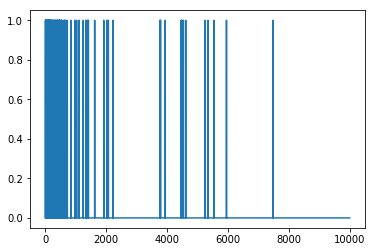

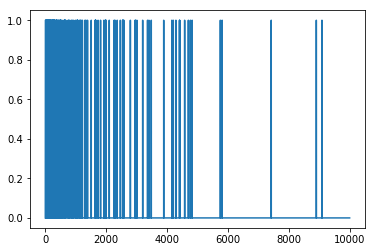

<Figure size 432x288 with 0 Axes>

In [17]:
# Examine a multi-hot vector
print(train_data[0])
plt.plot(train_data[0])
plt.show()
plt.clf()
plt.plot(train_data[1000])
plt.show()
plt.clf()

# Demonstrate Overfitting

## Create a baseline model 

In [22]:
baseline_model = keras.Sequential([
    # Input shape is only required so summary() works
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

baseline_model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy", "binary_crossentropy"]
)
baseline_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 16)                160016    
_________________________________________________________________
dense_13 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [23]:
baseline_hist = baseline_model.fit(
    train_data,
    train_labels,
    epochs=20,
    batch_size=512,
    validation_data=(test_data, test_labels),
    verbose=2
)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 5s - loss: 0.4940 - acc: 0.7963 - binary_crossentropy: 0.4940 - val_loss: 0.3424 - val_acc: 0.8728 - val_binary_crossentropy: 0.3424
Epoch 2/20
 - 4s - loss: 0.2541 - acc: 0.9082 - binary_crossentropy: 0.2541 - val_loss: 0.2839 - val_acc: 0.8881 - val_binary_crossentropy: 0.2839
Epoch 3/20
 - 3s - loss: 0.1859 - acc: 0.9351 - binary_crossentropy: 0.1859 - val_loss: 0.2871 - val_acc: 0.8856 - val_binary_crossentropy: 0.2871
Epoch 4/20
 - 4s - loss: 0.1480 - acc: 0.9490 - binary_crossentropy: 0.1480 - val_loss: 0.3103 - val_acc: 0.8795 - val_binary_crossentropy: 0.3103
Epoch 5/20
 - 4s - loss: 0.1207 - acc: 0.9603 - binary_crossentropy: 0.1207 - val_loss: 0.3367 - val_acc: 0.8744 - val_binary_crossentropy: 0.3367
Epoch 6/20
 - 4s - loss: 0.0974 - acc: 0.9706 - binary_crossentropy: 0.0974 - val_loss: 0.3678 - val_acc: 0.8702 - val_binary_crossentropy: 0.3678
Epoch 7/20
 - 4s - loss: 0.0780 - acc: 0.9785 - binary_crossentropy:

## Create a smaller model

In [36]:
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

smaller_model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy", "binary_crossentropy"]
)

smaller_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 4)                 40004     
_________________________________________________________________
dense_37 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_38 (Dense)             (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [37]:
smaller_hist = smaller_model.fit(
    train_data,
    train_labels,
    epochs=20,
    batch_size=512,
    validation_data=(test_data, test_labels),
    verbose=2
)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 4s - loss: 0.6217 - acc: 0.6444 - binary_crossentropy: 0.6217 - val_loss: 0.5634 - val_acc: 0.7676 - val_binary_crossentropy: 0.5634
Epoch 2/20
 - 3s - loss: 0.5099 - acc: 0.8223 - binary_crossentropy: 0.5099 - val_loss: 0.5032 - val_acc: 0.8261 - val_binary_crossentropy: 0.5032
Epoch 3/20
 - 3s - loss: 0.4527 - acc: 0.8803 - binary_crossentropy: 0.4527 - val_loss: 0.4719 - val_acc: 0.8516 - val_binary_crossentropy: 0.4719
Epoch 4/20
 - 3s - loss: 0.4111 - acc: 0.9085 - binary_crossentropy: 0.4111 - val_loss: 0.4479 - val_acc: 0.8685 - val_binary_crossentropy: 0.4479
Epoch 5/20
 - 3s - loss: 0.3743 - acc: 0.9278 - binary_crossentropy: 0.3743 - val_loss: 0.4290 - val_acc: 0.8760 - val_binary_crossentropy: 0.4290
Epoch 6/20
 - 3s - loss: 0.3409 - acc: 0.9405 - binary_crossentropy: 0.3409 - val_loss: 0.4139 - val_acc: 0.8789 - val_binary_crossentropy: 0.4139
Epoch 7/20
 - 3s - loss: 0.3084 - acc: 0.9515 - binary_crossentropy:

# Create a bigger model

In [33]:
bigger_model = keras.models.Sequential([
    keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

bigger_model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy", "binary_crossentropy"]
)
bigger_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 512)               5120512   
_________________________________________________________________
dense_34 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


In [34]:
bigger_hist = bigger_model.fit(
    train_data,
    train_labels,
    epochs=20,
    batch_size=512,
    validation_data=(test_data, test_labels),
    verbose=2
)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 14s - loss: 0.3572 - acc: 0.8422 - binary_crossentropy: 0.3572 - val_loss: 0.2942 - val_acc: 0.8790 - val_binary_crossentropy: 0.2942
Epoch 2/20
 - 17s - loss: 0.1496 - acc: 0.9457 - binary_crossentropy: 0.1496 - val_loss: 0.3216 - val_acc: 0.8743 - val_binary_crossentropy: 0.3216
Epoch 3/20
 - 14s - loss: 0.0503 - acc: 0.9849 - binary_crossentropy: 0.0503 - val_loss: 0.4187 - val_acc: 0.8696 - val_binary_crossentropy: 0.4187
Epoch 4/20
 - 19s - loss: 0.0072 - acc: 0.9988 - binary_crossentropy: 0.0072 - val_loss: 0.6029 - val_acc: 0.8708 - val_binary_crossentropy: 0.6029
Epoch 5/20
 - 15s - loss: 8.0722e-04 - acc: 1.0000 - binary_crossentropy: 8.0722e-04 - val_loss: 0.6817 - val_acc: 0.8703 - val_binary_crossentropy: 0.6817
Epoch 6/20
 - 14s - loss: 2.1716e-04 - acc: 1.0000 - binary_crossentropy: 2.1716e-04 - val_loss: 0.7205 - val_acc: 0.8705 - val_binary_crossentropy: 0.7205
Epoch 7/20
 - 15s - loss: 1.2828e-04 - acc: 1.

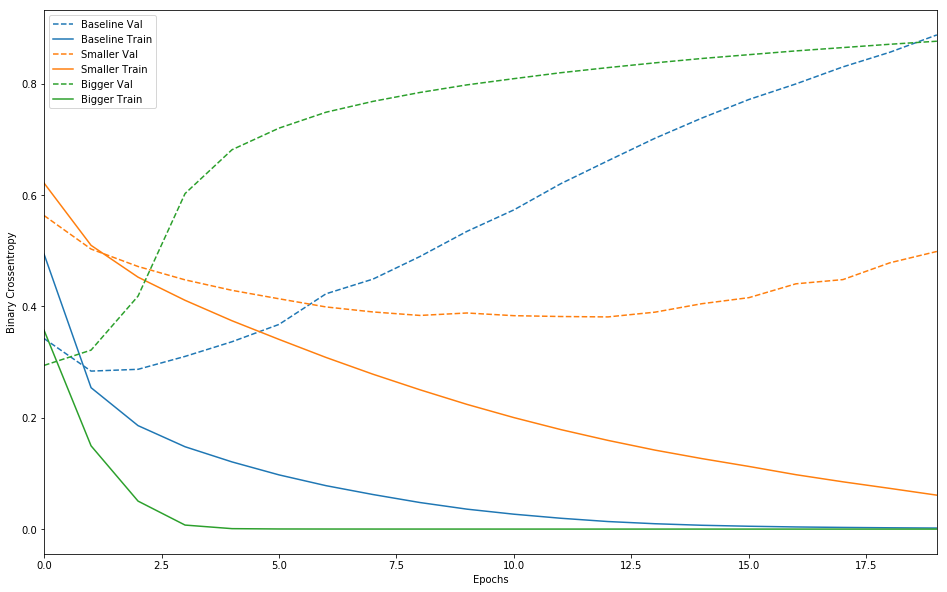

In [38]:
def plot_history(histories, key="binary_crossentropy"):
    plt.figure(figsize=(16, 10))
    
    for name, history in histories:
        val = plt.plot(history.epoch, history.history["val_" + key],
                       "--", label=name.title() + " Val")
        plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
                 label=name.title() + " Train")
    
    plt.xlabel("Epochs")
    plt.ylabel(key.replace("_", " ").title())
    plt.legend()
    
    plt.xlim([0, max(history.epoch)])
    
plot_history([
    ("baseline", baseline_hist),
    ("smaller", smaller_hist),
    ("bigger", bigger_hist)
])

# Strategies

## Add weight regularization

In [40]:
l2_model = keras.models.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

l2_model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy", "binary_crossentropy"]
)

l2_model_hist = l2_model.fit(
    train_data,
    train_labels,
    epochs=20,
    batch_size=512,
    validation_data=(test_data, test_labels),
    verbose=2
)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 4s - loss: 0.5193 - acc: 0.8175 - binary_crossentropy: 0.4744 - val_loss: 0.3808 - val_acc: 0.8763 - val_binary_crossentropy: 0.3331
Epoch 2/20
 - 4s - loss: 0.3045 - acc: 0.9098 - binary_crossentropy: 0.2528 - val_loss: 0.3433 - val_acc: 0.8856 - val_binary_crossentropy: 0.2889
Epoch 3/20
 - 4s - loss: 0.2549 - acc: 0.9294 - binary_crossentropy: 0.1982 - val_loss: 0.3430 - val_acc: 0.8855 - val_binary_crossentropy: 0.2847
Epoch 4/20
 - 4s - loss: 0.2308 - acc: 0.9411 - binary_crossentropy: 0.1710 - val_loss: 0.3567 - val_acc: 0.8818 - val_binary_crossentropy: 0.2958
Epoch 5/20
 - 4s - loss: 0.2163 - acc: 0.9471 - binary_crossentropy: 0.1541 - val_loss: 0.3841 - val_acc: 0.8741 - val_binary_crossentropy: 0.3211
Epoch 6/20
 - 4s - loss: 0.2069 - acc: 0.9520 - binary_crossentropy: 0.1429 - val_loss: 0.3851 - val_acc: 0.8758 - val_binary_crossentropy: 0.3204
Epoch 7/20
 - 4s - loss: 0.1991 - acc: 0.9546 - binary_crossentropy:

## Add dropout

In [44]:
dpt_model = keras.models.Sequential([
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

dpt_model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy", "binary_crossentropy"]
)

dpt_model_hist = dpt_model.fit(
    train_data,
    train_labels,
    epochs=20,
    batch_size=512,
    validation_data=(test_data, test_labels),
    verbose=2
)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 5s - loss: 0.6308 - acc: 0.6329 - binary_crossentropy: 0.6308 - val_loss: 0.5079 - val_acc: 0.8470 - val_binary_crossentropy: 0.5079
Epoch 2/20
 - 4s - loss: 0.4632 - acc: 0.7960 - binary_crossentropy: 0.4632 - val_loss: 0.3371 - val_acc: 0.8823 - val_binary_crossentropy: 0.3371
Epoch 3/20
 - 4s - loss: 0.3534 - acc: 0.8624 - binary_crossentropy: 0.3534 - val_loss: 0.2862 - val_acc: 0.8884 - val_binary_crossentropy: 0.2862
Epoch 4/20
 - 4s - loss: 0.2922 - acc: 0.8949 - binary_crossentropy: 0.2922 - val_loss: 0.2710 - val_acc: 0.8904 - val_binary_crossentropy: 0.2710
Epoch 5/20
 - 4s - loss: 0.2504 - acc: 0.9110 - binary_crossentropy: 0.2504 - val_loss: 0.2744 - val_acc: 0.8889 - val_binary_crossentropy: 0.2744
Epoch 6/20
 - 4s - loss: 0.2212 - acc: 0.9234 - binary_crossentropy: 0.2212 - val_loss: 0.2849 - val_acc: 0.8868 - val_binary_crossentropy: 0.2849
Epoch 7/20
 - 4s - loss: 0.1907 - acc: 0.9331 - binary_crossentropy:

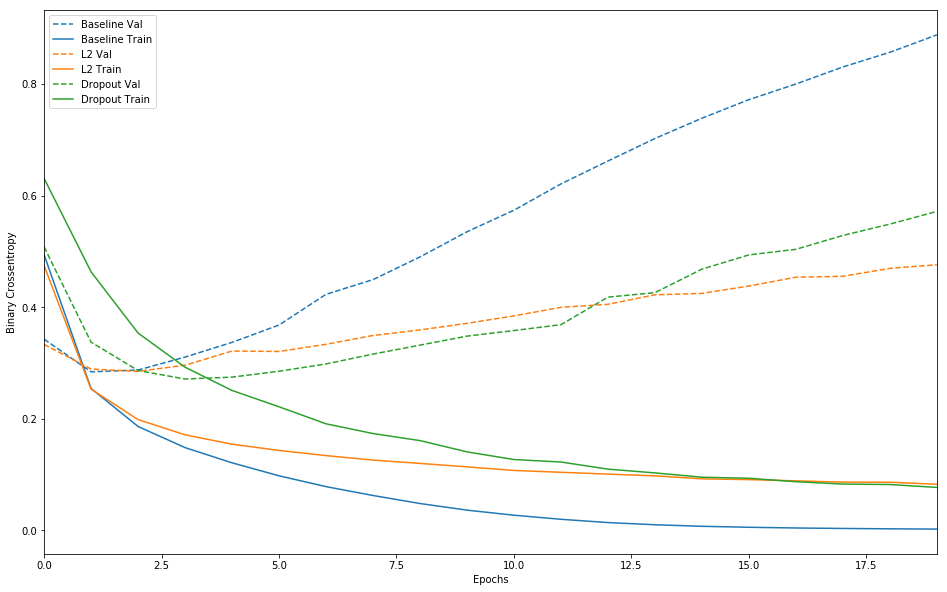

In [45]:
plot_history([
    ("baseline", baseline_hist),
    ("l2", l2_model_hist),
    ("dropout", dpt_model_hist)
])

## Data augmentation
Bootstrapping

In [85]:
train_mtx = np.hstack((train_data, train_labels.reshape(train_labels.shape[0], 1)))
r_indx = np.random.choice(train_mtx.shape[0] - 1, size = train_mtx.shape[0] * 2, replace=True)
aug_train_data = train_mtx[r_indx, :-1]
aug_train_labels = train_mtx[r_indx, -1]

In [88]:
aug_model = keras.models.Sequential([
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

aug_model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy", "binary_crossentropy"]
)

aug_model_hist = dpt_model.fit(
    aug_train_data,
    aug_train_labels,
    epochs=20,
    batch_size=512,
    validation_data=(test_data, test_labels),
    verbose=2
)

Train on 50000 samples, validate on 25000 samples
Epoch 1/20
 - 8s - loss: 0.0710 - acc: 0.9684 - binary_crossentropy: 0.0710 - val_loss: 0.5935 - val_acc: 0.8740 - val_binary_crossentropy: 0.5935
Epoch 2/20
 - 6s - loss: 0.0668 - acc: 0.9701 - binary_crossentropy: 0.0668 - val_loss: 0.6119 - val_acc: 0.8728 - val_binary_crossentropy: 0.6119
Epoch 3/20
 - 6s - loss: 0.0613 - acc: 0.9711 - binary_crossentropy: 0.0613 - val_loss: 0.6588 - val_acc: 0.8733 - val_binary_crossentropy: 0.6588
Epoch 4/20
 - 6s - loss: 0.0602 - acc: 0.9705 - binary_crossentropy: 0.0602 - val_loss: 0.6873 - val_acc: 0.8726 - val_binary_crossentropy: 0.6873
Epoch 5/20
 - 6s - loss: 0.0575 - acc: 0.9716 - binary_crossentropy: 0.0575 - val_loss: 0.7096 - val_acc: 0.8711 - val_binary_crossentropy: 0.7096
Epoch 6/20
 - 6s - loss: 0.0559 - acc: 0.9726 - binary_crossentropy: 0.0559 - val_loss: 0.7279 - val_acc: 0.8710 - val_binary_crossentropy: 0.7279
Epoch 7/20
 - 6s - loss: 0.0548 - acc: 0.9720 - binary_crossentropy:

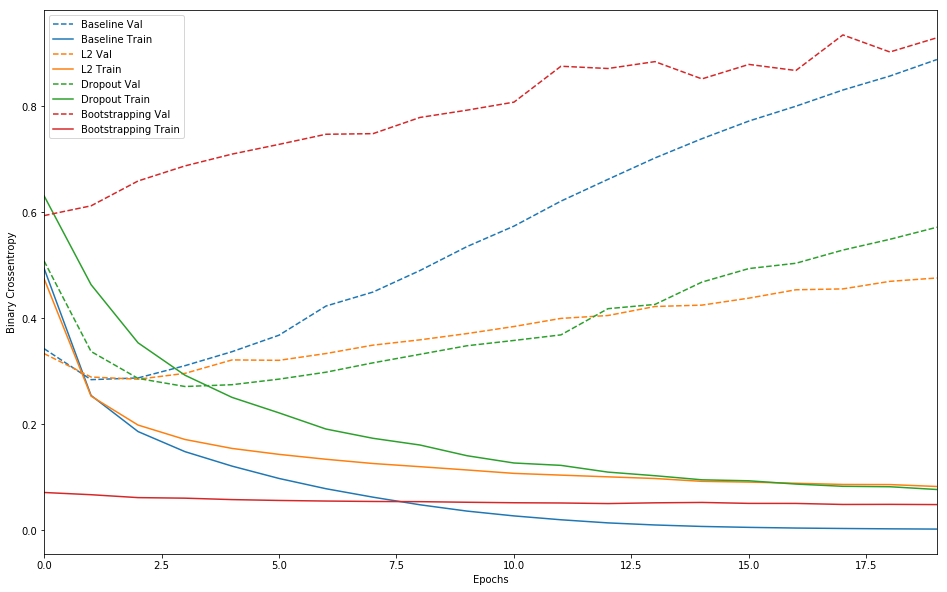

In [89]:
plot_history([
    ("baseline", baseline_hist),
    ("l2", l2_model_hist),
    ("dropout", dpt_model_hist),
    ("bootstrapping", aug_model_hist)
])

## Combine L2 and dropout

In [106]:
l2_dpt_model = keras.models.Sequential([
    keras.layers.Dense(16, activation=tf.nn.relu,input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation=tf.nn.sigmoid)
])

l2_dpt_model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy", "binary_crossentropy"]
)

l2_dpt_model_hist = l2_dpt_model.fit(
    train_data,
    train_labels,
    epochs=20,
    batch_size=512,
    validation_data=(test_data, test_labels),
    verbose=2
)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 4s - loss: 0.6459 - acc: 0.6563 - binary_crossentropy: 0.6301 - val_loss: 0.5499 - val_acc: 0.8408 - val_binary_crossentropy: 0.5349
Epoch 2/20
 - 4s - loss: 0.5098 - acc: 0.8194 - binary_crossentropy: 0.4948 - val_loss: 0.4433 - val_acc: 0.8776 - val_binary_crossentropy: 0.4282
Epoch 3/20
 - 4s - loss: 0.4195 - acc: 0.8720 - binary_crossentropy: 0.4043 - val_loss: 0.3835 - val_acc: 0.8776 - val_binary_crossentropy: 0.3683
Epoch 4/20
 - 4s - loss: 0.3581 - acc: 0.9020 - binary_crossentropy: 0.3427 - val_loss: 0.3439 - val_acc: 0.8823 - val_binary_crossentropy: 0.3285
Epoch 5/20
 - 4s - loss: 0.3168 - acc: 0.9176 - binary_crossentropy: 0.3012 - val_loss: 0.3309 - val_acc: 0.8849 - val_binary_crossentropy: 0.3153
Epoch 6/20
 - 4s - loss: 0.2850 - acc: 0.9310 - binary_crossentropy: 0.2692 - val_loss: 0.3242 - val_acc: 0.8850 - val_binary_crossentropy: 0.3082
Epoch 7/20
 - 4s - loss: 0.2636 - acc: 0.9358 - binary_crossentropy:

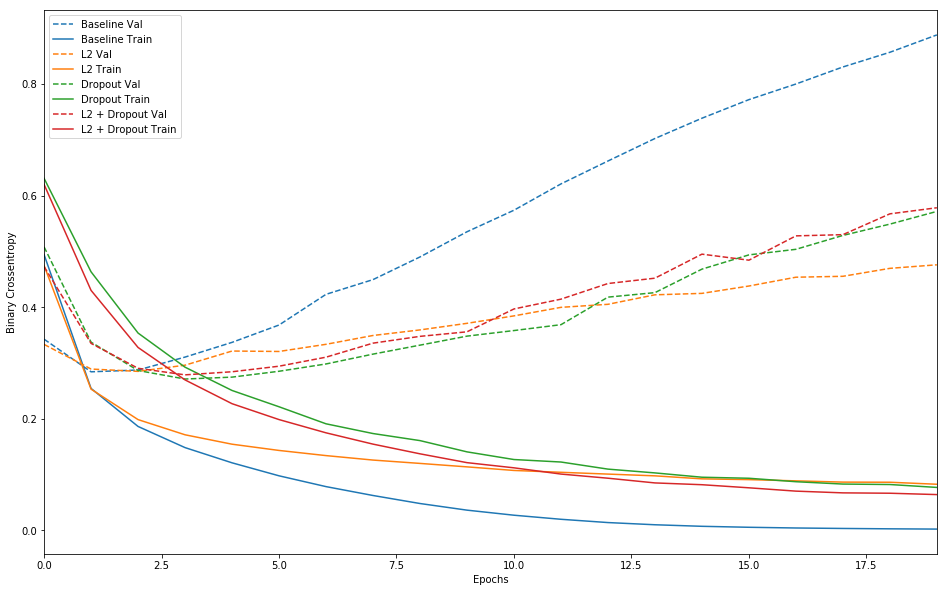

In [107]:
plot_history([
    ("baseline", baseline_hist),
    ("l2", l2_model_hist),
    ("dropout", dpt_model_hist),
    ("l2 + dropout", var_dpt_model_hist)
])